In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('./data/1day.csv')
df.columns = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'close_time']
df.head()

,open_time,open_price,high_price,low_price,close_price,volume,close_time
0,1.503014e+09,302.00,311.79,283.94,293.96,9537.84646,1503100799999
1,1.503101e+09,293.31,299.90,278.00,290.91,2146.19773,1503187199999
2,1.503187e+09,289.41,300.53,282.85,299.10,2510.13871,1503273599999
3,1.503274e+09,299.10,346.52,294.60,323.29,5219.44542,1503359999999
4,1.503360e+09,321.04,330.41,144.21,309.80,7956.35088,1503446399999


In [18]:
df.shape

(2053, 7)

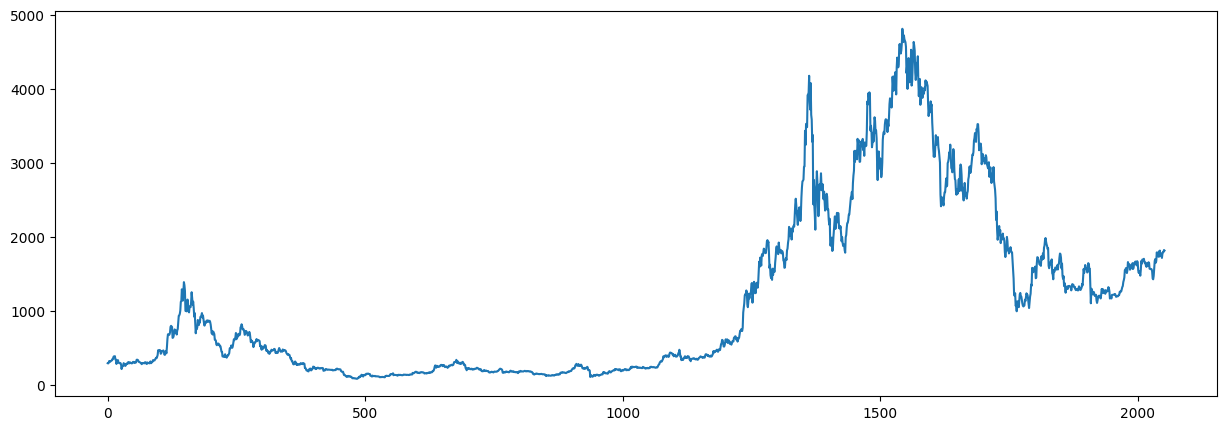

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(df['close_price'])
plt.show()


In [20]:
# check null
df.isnull().sum()

open_time      0
open_price     0
high_price     0
low_price      0
close_price    0
volume         0
close_time     0
dtype: int64

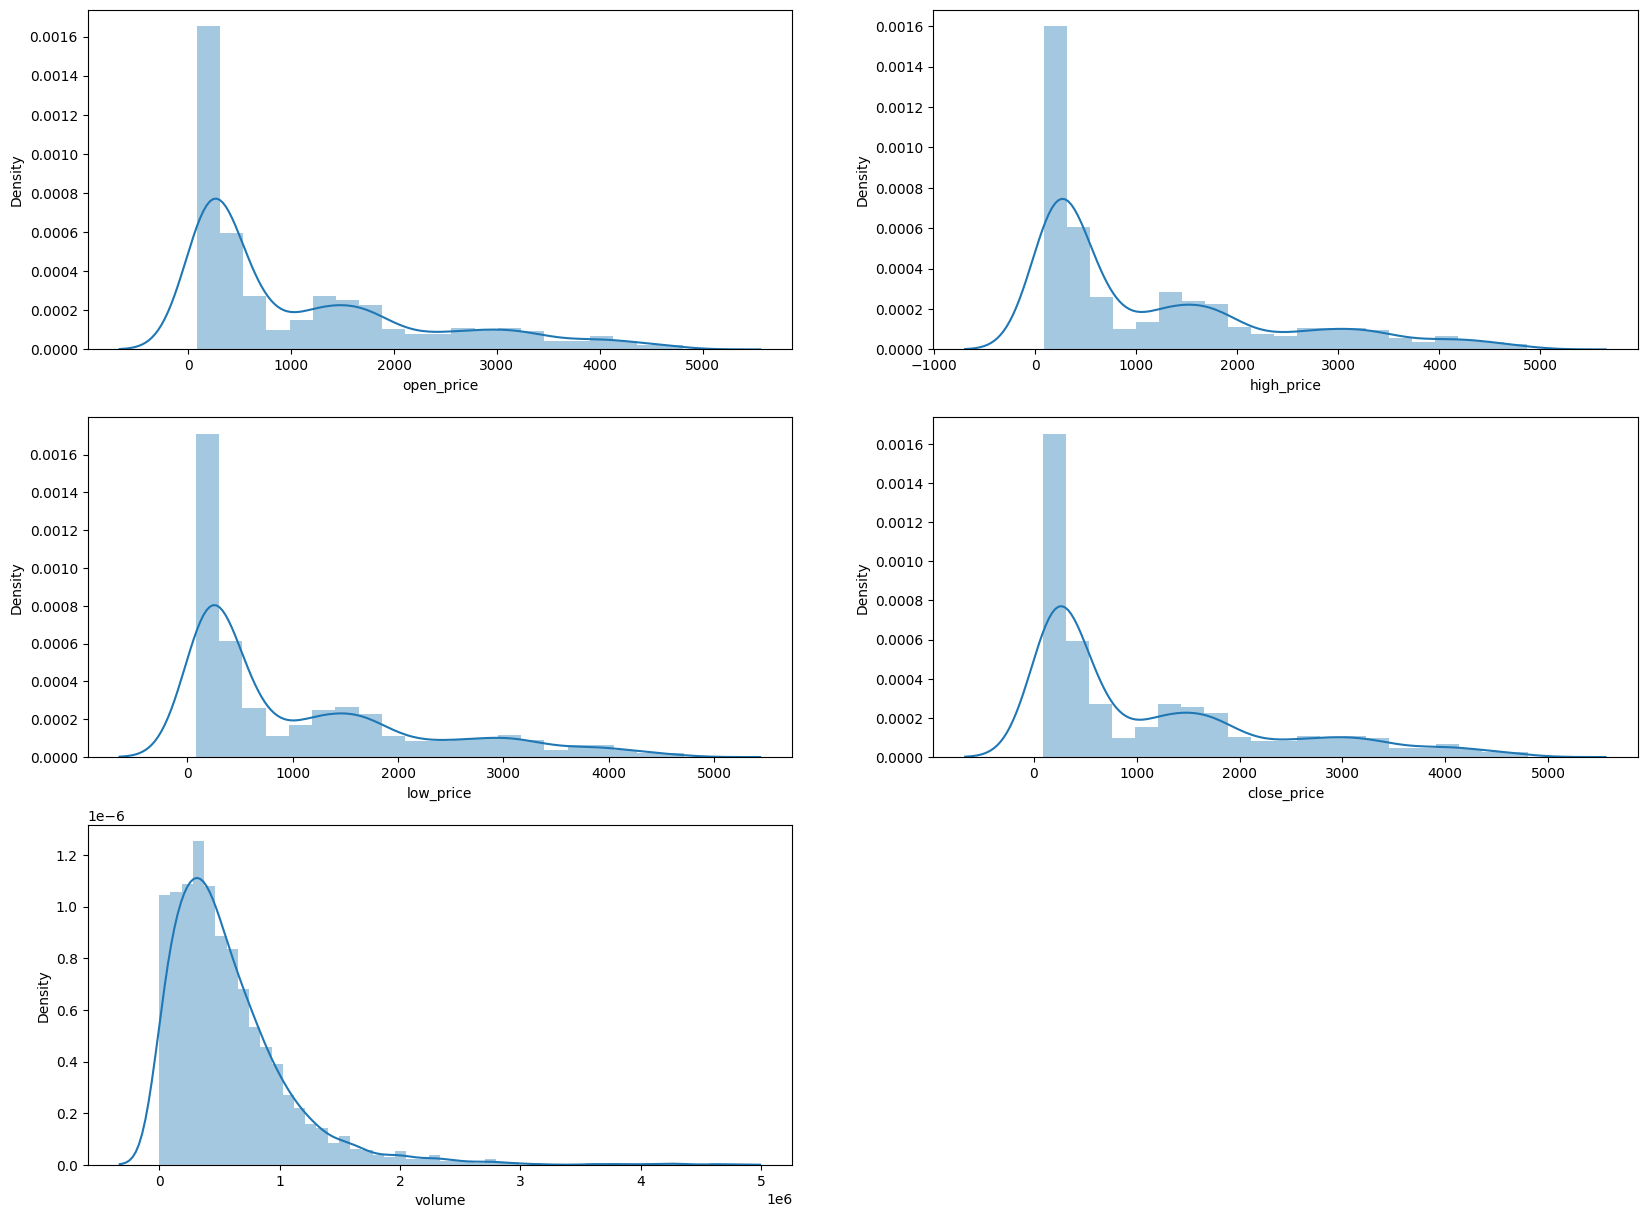

In [21]:
features = ['open_price', 'high_price', 'low_price', 'close_price', 'volume']

plt.subplots(figsize=(20, 15))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    # plt.plot(df[feature])
    sb.distplot(df[feature])


In [22]:
# timestamp to datetime
df = df.drop(['open_time'], axis=1)
# df['open_time'] = pd.to_datetime(df['open_time'], unit='ns')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
df.tail()

,open_price,high_price,low_price,close_price,volume,close_time
2048,1715.21,1795.73,1701.13,1772.99,536511.3973,2023-03-28 23:59:59.999
2049,1773.00,1827.99,1772.48,1793.07,536865.5972,2023-03-29 23:59:59.999
2050,1793.06,1829.69,1763.00,1793.61,579690.0394,2023-03-30 23:59:59.999
2051,1793.60,1847.28,1777.91,1821.52,554525.4762,2023-03-31 23:59:59.999
2052,1821.52,1842.83,1807.81,1814.34,237296.4168,2023-04-01 23:59:59.999


In [23]:
# df['open_day'] = df['open_time'].dt.day
# df['open_month'] = df['open_time'].dt.month
# df['open_year'] = df['open_time'].dt.year

df['close_day'] = df['close_time'].dt.day
df['close_month'] = df['close_time'].dt.month
df['close_year'] = df['close_time'].dt.year


In [24]:
df = df[df['close_year'] < 2023]
df.tail()

,open_price,high_price,low_price,close_price,volume,close_time,close_day,close_month,close_year
1957,1228.12,1233.73,1200.58,1211.55,262437.6398,2022-12-27 23:59:59.999,27,12,2022
1958,1211.55,1215.78,1181.06,1190.15,367828.8914,2022-12-28 23:59:59.999,28,12,2022
1959,1190.15,1206.57,1186.77,1200.49,249130.4869,2022-12-29 23:59:59.999,29,12,2022
1960,1200.48,1202.15,1181.08,1199.99,266014.2115,2022-12-30 23:59:59.999,30,12,2022
1961,1199.98,1208.46,1191.66,1196.13,139379.2811,2022-12-31 23:59:59.999,31,12,2022


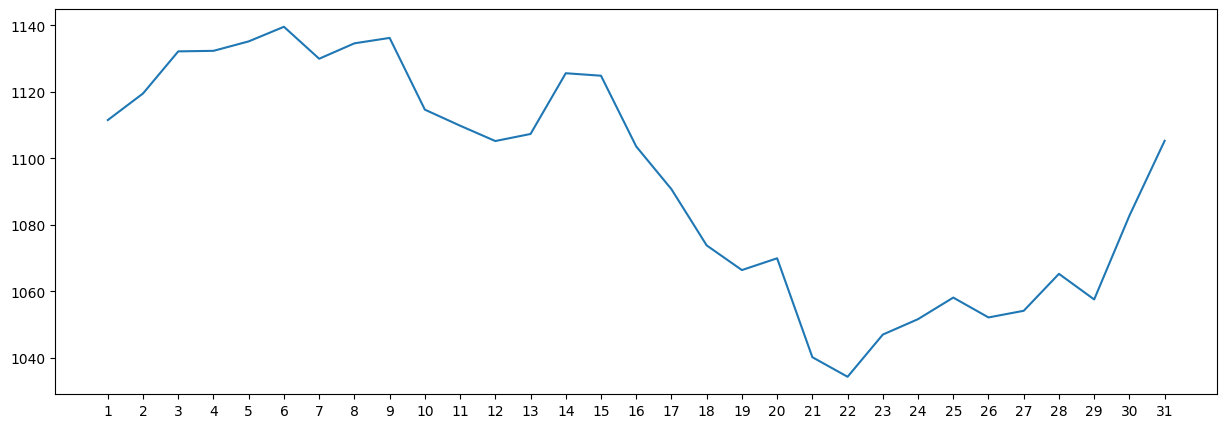

In [25]:
group_by_day = df.groupby('close_day').mean()
plt.figure(figsize=(15, 5))
plt.plot(group_by_day['close_price'])
plt.xticks(np.arange(1, 32, 1))
plt.show()


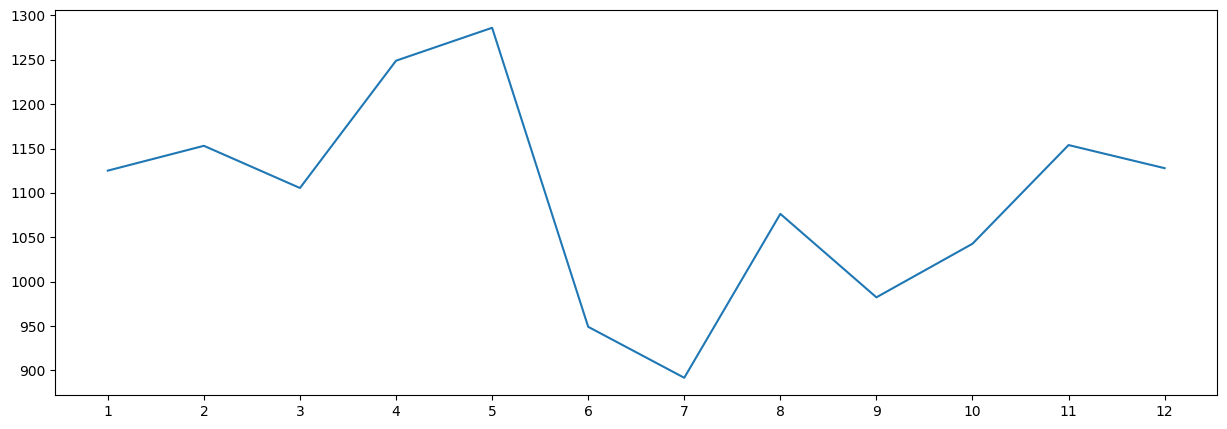

In [26]:
group_by_month = df.groupby('close_month').mean()
plt.figure(figsize=(15, 5))
plt.plot(group_by_month['close_price'])
plt.xticks(np.arange(1, 13, 1))
plt.show()

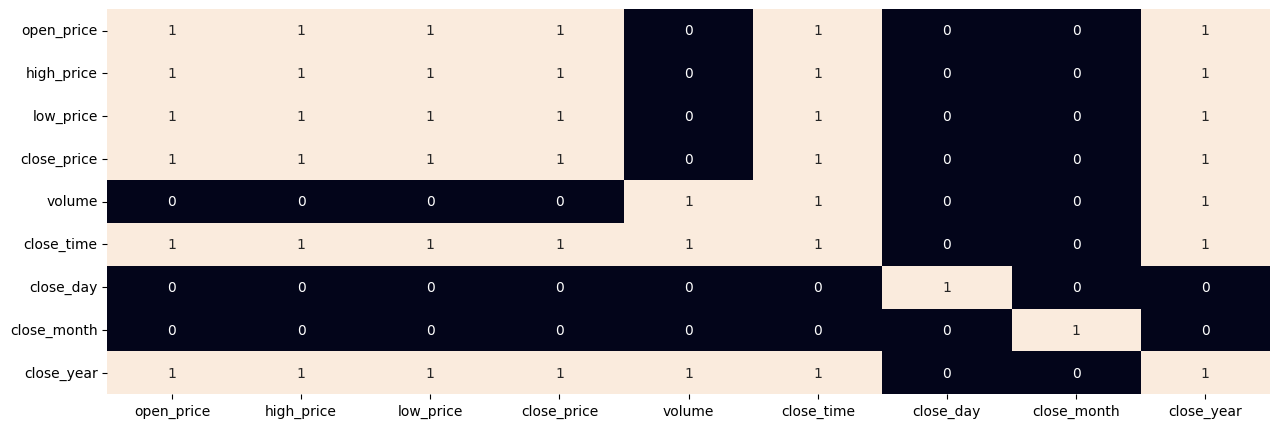

In [27]:
plt.figure(figsize=(15, 5))
sb.heatmap(df.corr() > 0.4, annot=True, cbar=False)
plt.show()

In [28]:
df['target'] = np.where(df['close_price'].shift(-1) > df['close_price'], 1, 0)
df['open-close'] = df['open_price'] - df['close_price']
df['high-low'] = df['high_price'] - df['low_price']

In [29]:
df['target'].value_counts()

target
1    1002
0     960
Name: count, dtype: int64

In [36]:
features = df[['open-close']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1569, 1) (393, 1) (1569,) (393,)


In [38]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, y_train)
    # print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict_proba(X_test)[:,1]))
    print()


Training Accuracy :  0.5455736451759807
Validation Accuracy :  0.5541450777202073

